In [1]:
#we have accomodations to extend this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from sklearn.utils import shuffle

In [2]:
#declaring norm function with the 2d array dataset
def norm(dataset):
    #looping though each column index except the last colums
    for column_index in range(dataset.shape[1] - 1):
        
        #determining min and max values from the current columns to scale the data between [0,1]
        max_val = dataset[column_index].max()
        min_val = dataset[column_index].min()

        #normalizing the column to fall within the range [0,1]
        #this will modify the dataset in place allowing the original values to be replaced by the normalized values
        dataset.iloc[:, column_index] = (dataset.iloc[:, column_index] - min_val) / (max_val - min_val)


In [3]:
#predict function with 2 parmeters weight vector (w) and input vector (x)
def predict(weights, inputs):
    # Ensure inputs is a 2D array with one row if it's a 1D array
    inputs = np.atleast_2d(inputs)
    bias = np.ones((inputs.shape[0], 1))
    inputs = np.hstack((inputs, bias))
    return 1 / (1 + np.exp(-np.dot(inputs, weights)))


  # Assuming sigmoid activation


# get accuracy, confusion matrices, rate and optimized weight vector

#dataset-data the model is trained on
#split-fraction of the dataset that is being used for training
#error-the fucntion tha will keep updating the weights until the error becomes less than this threshold
#alpha-the learning rate for the perceptron training
def train(dataset, split, error_threshold, alpha):
        
    #splitting into training and testing data
    group0 = dataset[dataset.iloc[:, 2] == 0]
    group1 = dataset[dataset.iloc[:, 2] == 1]
    sample_size = int(min(len(group0), len(group1)) * split)
    sampled_subset0 = group0.sample(n = sample_size, random_state = 42)
    sampled_subset1 = group1.sample(n = sample_size, random_state = 42)
    training = pd.concat([sampled_subset0, sampled_subset1])
    testing = dataset.drop(training.index)   
    
    
    
    #initialization stuff
    limit = 5000
    patterns = training.shape[0]
    w = [random.uniform(-0.5, 0.5) for _ in range(training.shape[1])]

    batch_size = 32  # Size of mini-batches
    
    
    #training 
    i = 0
    error = patterns  # Initial error

    while i < limit and error > error_threshold:
        training = shuffle(training)  # Shuffle the data at the beginning of each epoch
        for batch in range(0, patterns, batch_size):
            X_batch = training.iloc[batch:batch + batch_size].drop(2, axis=1).values
            y_batch = training.iloc[batch:batch + batch_size, 2].values



            # Forward pass
            scaled_X_batch = predict(w, X_batch)

            # Compute the gradient
            # Append a column of ones to X_batch for the bias term
            X_batch_bias = np.hstack((X_batch, np.ones((X_batch.shape[0], 1))))

            # Compute the gradient
            delta_w = alpha * np.dot((y_batch - scaled_X_batch), X_batch_bias) / batch_size


            # Update weights
            w += delta_w

        # Compute the error at the end of each epoch
        error = np.sum((training.iloc[:, 2].values - predict(w, training.drop(2, axis=1).values)) ** 2)


        i += 1

    print(f"Total error in training is: {error}")

    
    
    
    #testing
    true_positive = false_positive = true_negative = false_negative = 0
    for row in range(testing.shape[0]):
        x = testing.iloc[row, :-1].values  # Exclude the last value (the label)
        predicted = 1 if predict(w, x) >= 0.5 else 0
        true = testing.iloc[row, 2]
        
        if predicted == 1 and true == 1:
            true_positive += 1
        elif predicted == 1 and true == 0:
            false_positive += 1
        elif predicted == 0 and true == 1:
            false_negative += 1
        else:
            true_negative += 1
    
    accuracy = (true_positive + true_negative) / testing.shape[0]
    denominator_tp_fp = true_positive + false_positive
    true_positive_rate = (true_positive / denominator_tp_fp * 100) if denominator_tp_fp != 0 else 0
    false_positive_rate = (false_positive / denominator_tp_fp * 100) if denominator_tp_fp != 0 else 0
    denominator_tn_fn = true_negative + false_negative
    true_negative_rate = (true_negative / denominator_tn_fn * 100) if denominator_tn_fn != 0 else 0
    false_negative_rate = (false_negative / denominator_tn_fn * 100) if denominator_tn_fn != 0 else 0
    
    
    print(f"accuracy: {accuracy}")
    print("\t\tTrue yes\t\tTrue no")
    print(f"Predicted yes\t{true_positive} ({true_positive_rate}%)\t\t{false_positive} ({false_positive_rate}%)")
    print(f"Predicted no\t{false_negative} ({false_negative_rate}%)\t\t{true_negative} ({true_negative_rate}%)")
    
    
    
    
    
    
    
    # # Plotting
    # plt.scatter(training.iloc[:, 0], training.iloc[:, 1], c=training.iloc[:, 2], cmap='viridis', label='Training Data')
    # plt.scatter(testing.iloc[:, 0], testing.iloc[:, 1], c=testing.iloc[:, 2], cmap='viridis', marker='x', label='Testing Data')

    # #setting x and y variables
    # # x = np.linspace(start=min(dataset.iloc[:, 0]), stop=max(dataset.iloc[:, 0]), num=100)
    # x = np.linspace(training.iloc[:, 0].min(), training.iloc[:, 0].max(), 100)  # 100 points between min and max x values y_vals = - (w[0] / w[1]) * x_vals - (w[2] / w[1]) plt.plot(x_vals, y_vals, 'k--')  # 'k--' specifies a black dashed line
    # y = (-w[0] * x - w[2]) / w[1]
    # plt.plot(x, y, '-r', label='Decision Boundary')



    # plt.plot(np.linspace(-10,10, 100))

    # #labeling axis
    # plt.xlabel('Normalized Cost(USD)')
    # plt.ylabel('Normalized Weight(pounds)')
    # plt.legend(loc='best')
    # plt.show()
    
    # w = w / np.linalg.norm(w)
    
    plt.figure()
    plt.scatter(training.iloc[:, 0], training.iloc[:, 1], c=training.iloc[:, 2], cmap='viridis', label='Training Data')
    plt.scatter(testing.iloc[:, 0], testing.iloc[:, 1], c=testing.iloc[:, 2], cmap='viridis', marker='x', label='Testing Data')

    x = np.linspace(0, 1, 400)
    y = -(w[0]/w[1]) * x - (w[2]/w[1])   

    plt.plot(x, y, '-r')
    plt.show()
    
    return w

In [4]:
#read the datasets
a = pd.read_csv("groupA.csv", header = None)
b = pd.read_csv("groupB.csv", header = None)
c = pd.read_csv("groupC.csv", header = None)
patterns = len(a)



#convert to numeric
for col in a.columns:
    a[col] = a[col].apply(pd.to_numeric, errors = 'coerce')
    b[col] = b[col].apply(pd.to_numeric, errors = 'coerce')
    c[col] = c[col].apply(pd.to_numeric, errors = 'coerce')
    
    

#normalize the data
norm(a)
norm(b)
norm(c)



In [5]:
# #hard activation
# print("HARD ACTIVATION")
# print("---------------------------------------")
# print("\nGroupA")
# print(train(a, 3/4, 0.00001, 0.1))
# print(train(a, 1/4, 0.00001, 0.1))

# print("\nGroupB")
# print(train(b, 3/4, 40, 0.1))
# print(train(b, 1/4, 40, 0.1))

# print("\nGroupC")
# print(train(c, 3/4, 700, 0.1)) #fix the train method
# print(train(c, 1/4, 700, 0.1))

SOFT ACTIVATION
---------------------------------------

GroupA


Total error in training is: 0.0009697565668167424
accuracy: 1.0
		True yes		True no
Predicted yes	500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		500 (100.0%)


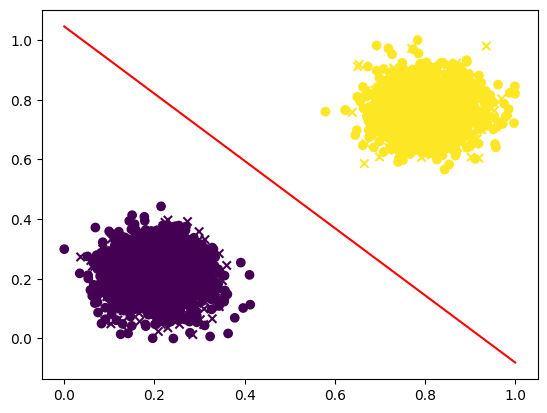

[ 16.69342121  14.82651697 -15.50145231]


Total error in training is: 0.002226777339727266
accuracy: 1.0
		True yes		True no
Predicted yes	1500 (100.0%)		0 (0.0%)
Predicted no	0 (0.0%)		1500 (100.0%)


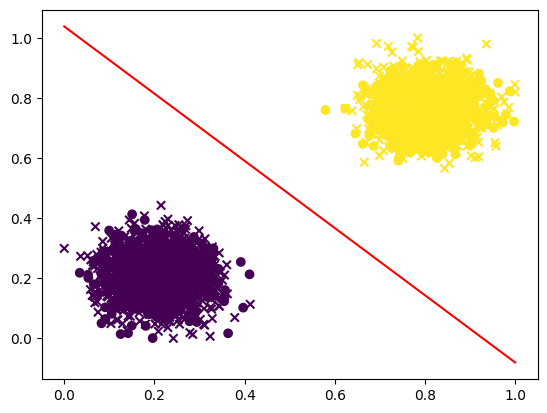

[ 14.39986873  12.87136908 -13.36535067]

GroupB


Total error in training is: 39.931975701374625
accuracy: 0.991
		True yes		True no
Predicted yes	495 (99.19839679358718%)		4 (0.8016032064128256%)
Predicted no	5 (0.998003992015968%)		496 (99.00199600798403%)


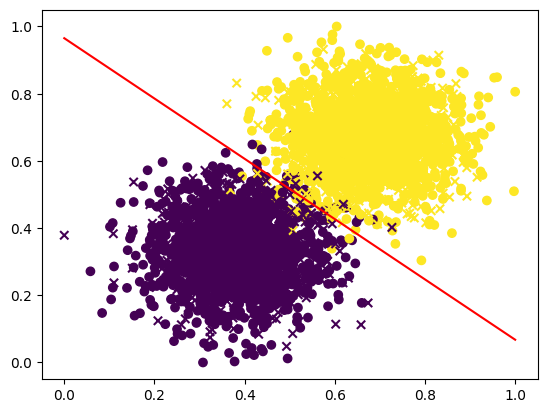

[ 11.66208024  12.99564422 -12.54207998]


Total error in training is: 39.67134407743784
accuracy: 0.9883333333333333
		True yes		True no
Predicted yes	1486 (98.60650298606502%)		21 (1.39349701393497%)
Predicted no	14 (0.9377093101138647%)		1479 (99.06229068988614%)


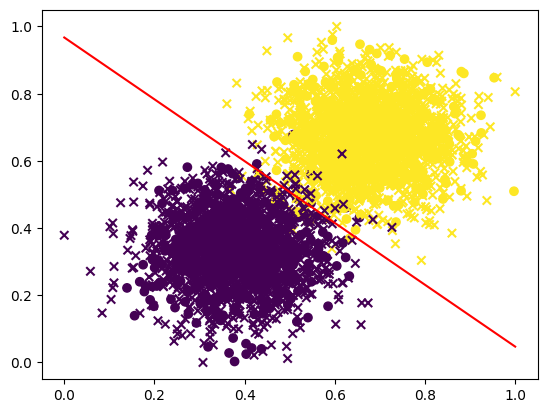

[ 5.46866968  5.94424182 -5.74935513]

GroupC
Total error in training is: 693.8244306196578
accuracy: 0.703
		True yes		True no
Predicted yes	425 (65.68778979907263%)		222 (34.31221020092735%)
Predicted no	75 (21.246458923512748%)		278 (78.75354107648725%)


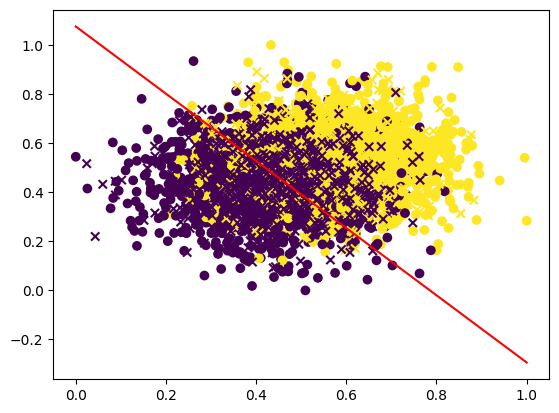

[ 0.84822557  0.61958711 -0.66629347]
Total error in training is: 243.38648191008684
accuracy: 0.6763333333333333
		True yes		True no
Predicted yes	1152 (64.90140845070422%)		623 (35.098591549295776%)
Predicted no	348 (28.408163265306126%)		877 (71.59183673469389%)


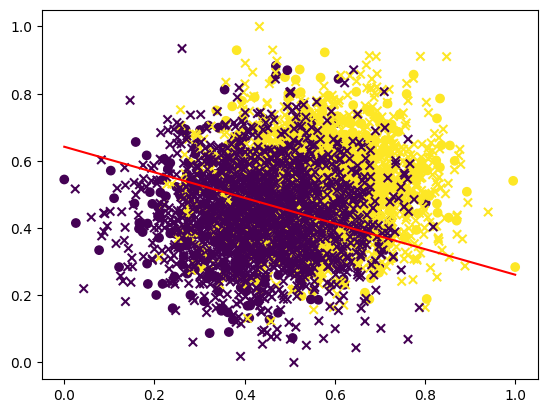

[ 0.16055047  0.42153971 -0.27065896]


In [6]:
#soft activation
print("SOFT ACTIVATION")
print("---------------------------------------")
print("\nGroupA")
print(train(a, 3/4, 0.00001, 0.1)) #75
print(train(a, 1/4, 0.00001, 0.1)) #25

print("\nGroupB")
print(train(b, 3/4, 40, 0.1))#75
print(train(b, 1/4, 40, 0.1))#25

print("\nGroupC")
print(train(c, 3/4, 700, 0.1))#75
print(train(c, 1/4, 700, 0.1))#25

